In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


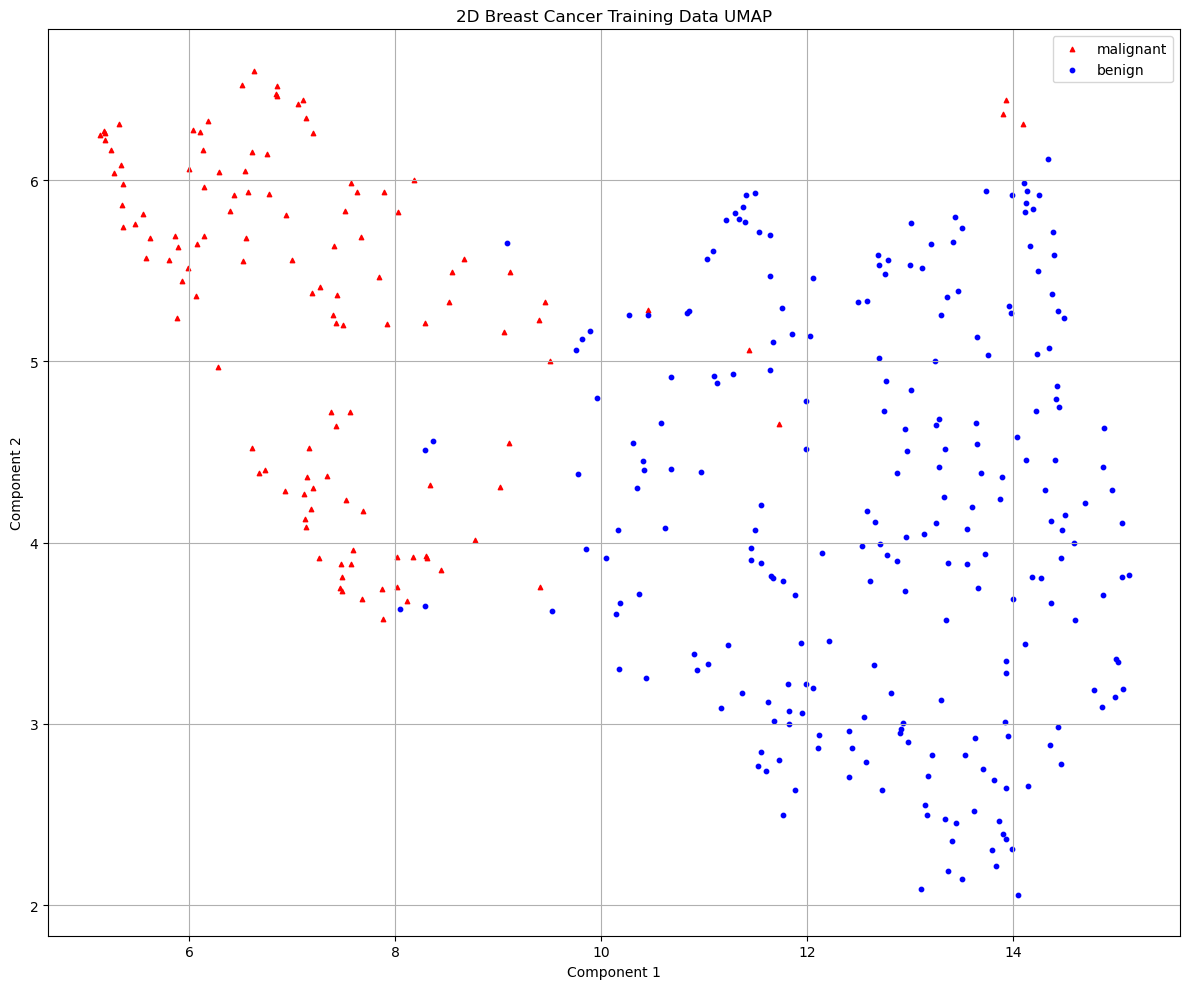

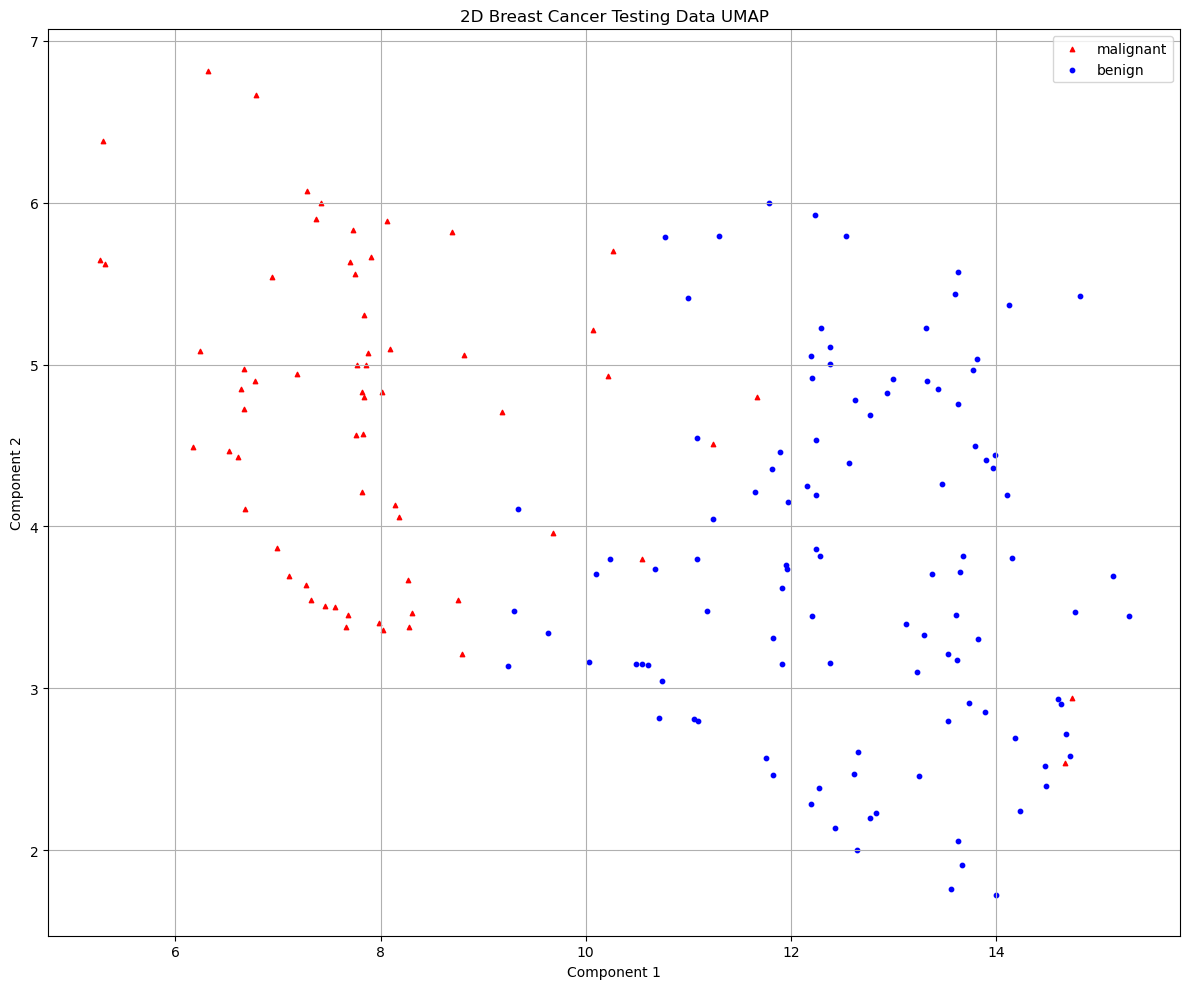

[I 2025-04-27 02:50:23,527] A new study created in memory with name: no-name-a7ebe16f-7d1d-45a1-90f9-637178953ed2
[I 2025-04-27 02:50:23,761] Trial 0 finished with value: 0.9558599695585996 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 10, 'p': 2}. Best is trial 0 with value: 0.9558599695585996.
[I 2025-04-27 02:50:23,916] Trial 1 finished with value: 0.9640791476407914 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 44, 'p': 2}. Best is trial 1 with value: 0.9640791476407914.
[I 2025-04-27 02:50:24,007] Trial 2 finished with value: 0.9613394216133943 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 38, 'p': 1}. Best is trial 1 with value: 0.9640791476407914.
[I 2025-04-27 02:50:24,193] Trial 3 finished with value: 0.953158295281583 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 49, 'p': 1}. Best is

Best trial:
Accuracy: 0.9777777777777779
Best hyperparameters:  {'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 25, 'p': 1}


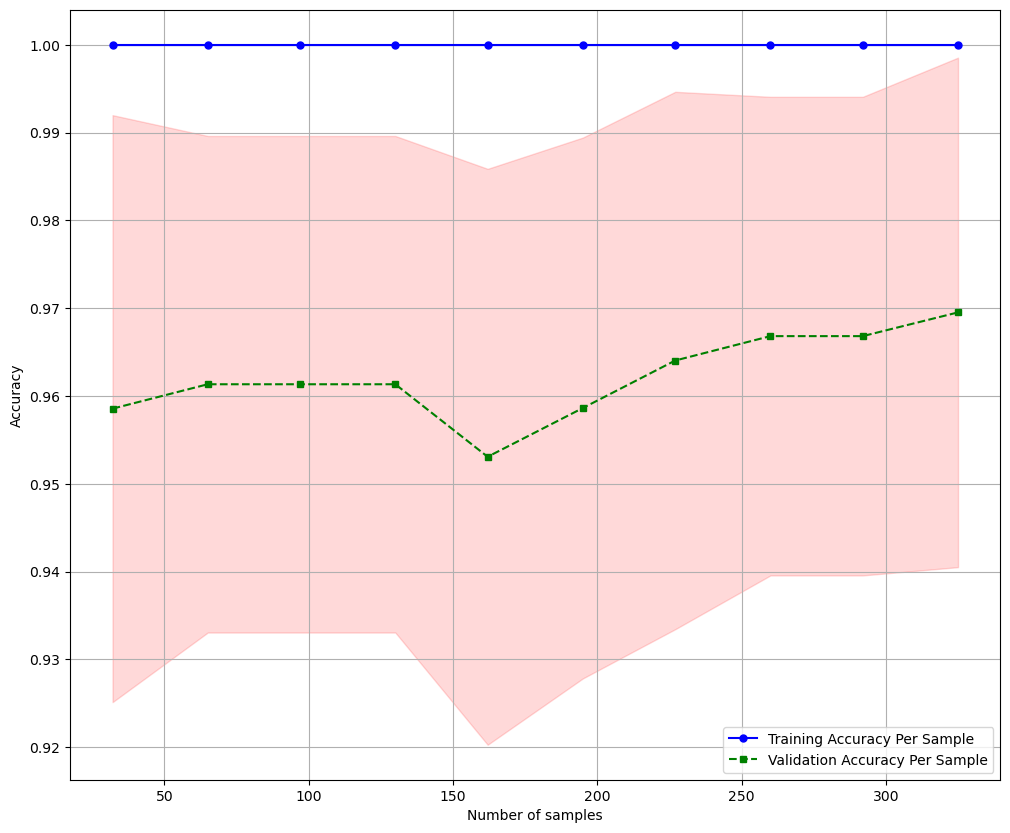

Confusion Matrix
[[ 52  12]
 [  1 106]]
Accuracy: 0.9240, Precision: 0.8983, Recall: 0.9907, F1: 0.9422, AUC:0.9463


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)